In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
% cd /Users/MiroWang/Desktop/Github Repo/CreditFraudData

/Users/MiroWang/Desktop/Github Repo/CreditFraudData


In [3]:
train_frame = pd.read_csv("train_frame_creditcard.csv")

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
X_rf = train_frame[train_frame.columns[:-1]].as_matrix()
y_rf = train_frame['Class']

strsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=36)
for train_index, test_index in strsplit.split(X_rf, y_rf):
    X_train_rf, X_test_rf = X_rf[train_index], X_rf[test_index]
    y_train_rf, y_test_rf = y_rf[train_index], y_rf[test_index]
    
print(X_train_rf.shape, X_test_rf.shape, y_train_rf.shape, y_test_rf.shape)

(205060, 30) (51266, 30) (205060,) (51266,)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfclf = RandomForestClassifier(class_weight = {0: 1, 1: 9})
parameters = {'max_depth':[2, 5], 'n_estimators':[150, 180, 130]}
rf = GridSearchCV(rfclf, parameters)


In [8]:
import timeit
start = timeit.default_timer()
rf.fit(X_train_rf, y_train_rf)
stop = timeit.default_timer()
print("Fitting Time: %s seconds" % (stop - start))

Fitting Time: 702.5867213989841 seconds


In [10]:
y_score = rf.predict_proba(X_test_rf)

array([0.00233213, 0.00254527, 0.00242925, ..., 0.00258419, 0.00235098,
       0.01545054])

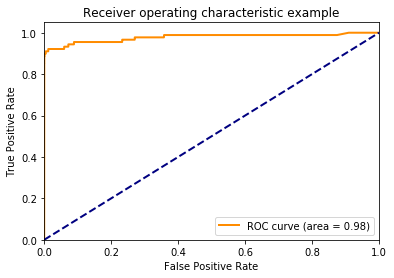

In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix, precision_score, recall_score

fpr, tpr, threshold = roc_curve(y_test_rf, y_score[:,1])

def plot_roc():
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc()

In [15]:
rf_cm = confusion_matrix(y_test_rf, rf.predict(X_test_rf))
print ("cost of random forest classifier %s" % (rf_cm[0][1]*1000 + rf_cm[1][0]*1))

cost of random forest classifier 9019


In [16]:
rf_cm

array([[51168,     9],
       [   19,    70]])